In [1]:
import json
import pandas as pd
import time
import os
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import numpy as np
import math
import scipy as sp
from scipy.stats import skew
from scipy.stats import kurtosis
import warnings
import scipy.stats as st
import statsmodels.api as sm
from scipy.stats._continuous_distns import _distn_names
import matplotlib

market_defs_initial = pd.read_csv('./csvs02/market_defs_initial.csv')
winners_df = pd.read_csv('./csvs02/winners.csv')

events = os.listdir('./csvs02/events/')

DataFrameDict = {elem : pd.DataFrame() for elem in events}

for key in DataFrameDict.keys():
    DataFrameDict[key] = pd.read_csv('./csvs02/events/' + key)

In [2]:
for key, df in DataFrameDict.items():
    df = df.reset_index()
    winners = winners_df[winners_df['eventId'] == int(key.replace('.csv', ''))].winner.copy().to_list()

    pos_returns = []
    pos_returns_t = []
    pos_returns_m = []
    neg_returns = []
    neg_returns_t = []
    neg_returns_m = []
    stake = 0
    dict_prices = dict.fromkeys(df.ltp.unique(), 0.0)
    for index, row in df.iterrows():
        if not math.isnan(row.ltp) :
            if float(row.tv) > dict_prices[row.ltp]:
                stake = float(row.tv) - dict_prices[row.ltp]
                dict_prices[row.ltp] = float(row.tv)

                pos_returns_t.append(str(row.t))
                pos_returns_m.append(str(row.marketId))
                neg_returns_t.append(str(row.t))
                neg_returns_m.append(str(row.marketId))
                if row.id in winners:
                    ret_w = stake * (float(row.ltp) - (float(market_defs_initial[market_defs_initial['eventId'] == int(key.replace('.csv', ''))].marketBaseRate.iloc[0])*0.01)*(float(row.ltp) - 1.0))
                    ret_l = -1.0 * stake * (float(row.ltp)-1.0)
                    pos_returns.append(ret_w)
                    neg_returns.append(ret_l)
                else:
                    ret_w = stake * (1.0 - (float(market_defs_initial[market_defs_initial['eventId'] == int(key.replace('.csv', ''))].marketBaseRate.iloc[0])*0.01))
                    ret_l = -1.0 * stake 
                    pos_returns.append(ret_w)
                    neg_returns.append(ret_l) 
                   

    pos_ret_df = pd.DataFrame({'ret':pos_returns, 't':pos_returns_t, 'm':pos_returns_m})
    neg_ret_df = pd.DataFrame({'ret':neg_returns, 't':neg_returns_t, 'm':neg_returns_m})

    pos_ret_df.to_csv("./csvs02/returns_both/" + key.replace('.csv', '') + "pos_ret.csv", index=False)
    neg_ret_df.to_csv("./csvs02/returns_both/" + key.replace('.csv', '') + "neg_ret.csv", index=False)

In [3]:
pos_ret_0 = pd.read_csv('csvs02/returns_both/27681540pos_ret.csv')
neg_ret_0 = pd.read_csv('csvs02/returns_both/27681540neg_ret.csv')

In [4]:
def stats_all(data):
    mu = data.mean()
    stdev = data.std()
    skewn = skew(data)
    kurt = kurtosis(data)
    nobs = data.size
    print('Mean: ' + str(mu) + '\n')
    print('Std: ' + str(stdev) + '\n')
    print('Skewness: ' + str(skewn) + '\n')
    print('Kurtosis: ' + str(kurt) + '\n')
    print('Number of observations: ' + str(nobs) + '\n')
    return mu, stdev, skewn, kurt, nobs

Returns distribution market by market

Mean: 3.966058463184852

Std: 3.3240342998134444

Skewness: -0.11892651690274006

Kurtosis: -0.28481755963667954

Number of observations: 6344

Mean: 3.7438833195295014

Std: 3.1657776203520016

Skewness: -0.11831545110784952

Kurtosis: -0.13845089758515083

Number of observations: 6344

Mean: 3.8549708913571767

Std: 3.2477709944735156

Skewness: -0.11354500449556387

Kurtosis: -0.21287668483786515

Number of observations: 12688



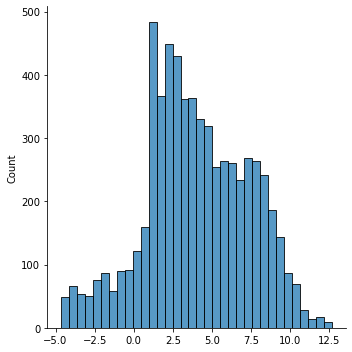

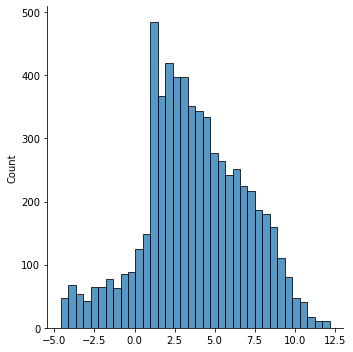

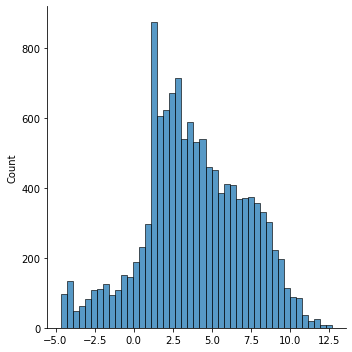

In [5]:
pos_ret_0 = pos_ret_0[pos_ret_0['ret'] >= 0.0]
log_pos_ret = np.log(np.abs(np.array(pos_ret_0['ret'])))
sns.displot(log_pos_ret)
mu_clp, stdev_clp, skewn_clp, kurt_clp, nobs_clp = stats_all(log_pos_ret)

neg_ret_0 = neg_ret_0[neg_ret_0['ret'] < 0.0]
log_neg_ret = np.log(np.abs(np.array(neg_ret_0['ret'])))
sns.displot(log_neg_ret)
mu_cln, stdev_cln, skewn_cln, kurt_cln, nobs_cln = stats_all(log_neg_ret)

log_ret = np.append(log_pos_ret, log_neg_ret)
sns.displot(log_ret)
mu_cl, stdev_cl, skewn_cl, kurt_cl, nobs_cl = stats_all(log_ret)